In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Flatten, Input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

### LOADING DATASET

In [2]:
df_annual = pd.read_csv("D:/CLASS_WORK/CAPSTONE/CODE/DATASET/annual-co2-emissions-per-country.csv")
df_sector = pd.read_csv("D:/CLASS_WORK/CAPSTONE/CODE/DATASET/co-emissions-by-sector.csv")
df_gdp = pd.read_csv("D:/CLASS_WORK/CAPSTONE/CODE/DATASET/co2-emissions-vs-gdp.csv")
df_capitapopgrowth = pd.read_csv("D:/CLASS_WORK/CAPSTONE/CODE/DATASET/co-emissions-per-capita-vs-population-growth.csv")
df_percapita = pd.read_csv("D:/CLASS_WORK/CAPSTONE/CODE/DATASET/PER_capita/consumption-co2-per-capita.csv")
df_trade = pd.read_csv("D:/CLASS_WORK/CAPSTONE/CODE/DATASET/co-emissions-embedded-in-global-trade.csv")
df_transport = pd.read_csv("D:/CLASS_WORK/CAPSTONE/CODE/DATASET/co2-emissions-transport.csv")
df_flaring = pd.read_csv("D:/CLASS_WORK/CAPSTONE/CODE/DATASET/annual-co2-flaring.csv")

### DATA CLEANING

#### For Sector

In [3]:
df_sector.head(10)

,Entity,Code,Year,Carbon dioxide emissions from buildings,Carbon dioxide emissions from industry,Carbon dioxide emissions from land use change and forestry,Carbon dioxide emissions from other fuel combustion,Carbon dioxide emissions from transport,Carbon dioxide emissions from manufacturing and construction,Fugitive emissions of carbon dioxide from energy production,Carbon dioxide emissions from electricity and heat
0,Afghanistan,AFG,1990,129999.99,50000.0,-2390000.0,0.0,980000.0,570000.0,NaN,320000.0
1,Afghanistan,AFG,1991,140000.00,50000.0,-2390000.0,0.0,930000.0,530000.0,NaN,300000.0
2,Afghanistan,AFG,1992,150000.00,50000.0,-2390000.0,0.0,740000.0,390000.0,NaN,200000.0
3,Afghanistan,AFG,1993,160000.00,50000.0,-2390000.0,0.0,740000.0,380000.0,NaN,200000.0
4,Afghanistan,AFG,1994,160000.00,50000.0,-2390000.0,0.0,730000.0,360000.0,NaN,190000.0
5,Afghanistan,AFG,1995,160000.00,50000.0,-2390000.0,0.0,730000.0,340000.0,NaN,180000.0
6,Afghanistan,AFG,1996,170000.00,50000.0,-2390000.0,0.0,700000.0,320000.0,NaN,170000.0
7,Afghanistan,AFG,1997,170000.00,50000.0,-2390000.0,0.0,670000.0,300000.0,NaN,160000.0
8,Afghanistan,AFG,1998,170000.00,50000.0,-2390000.0,0.0,670000.0,280000.0,NaN,160000.0
9,Afghanistan,AFG,1999,170000.00,50000.0,-2390000.0,0.0,490000.0,250000.0,NaN,160000.0


In [4]:
df_sector = df_sector.drop(columns=['Fugitive emissions of carbon dioxide from energy production'])

df_sector.to_csv('D:/CLASS_WORK/CAPSTONE/CODE/DATASET/clean/newsector.csv', index=False)

In [5]:
df_sector.head(10)

,Entity,Code,Year,Carbon dioxide emissions from buildings,Carbon dioxide emissions from industry,Carbon dioxide emissions from land use change and forestry,Carbon dioxide emissions from other fuel combustion,Carbon dioxide emissions from transport,Carbon dioxide emissions from manufacturing and construction,Carbon dioxide emissions from electricity and heat
0,Afghanistan,AFG,1990,129999.99,50000.0,-2390000.0,0.0,980000.0,570000.0,320000.0
1,Afghanistan,AFG,1991,140000.00,50000.0,-2390000.0,0.0,930000.0,530000.0,300000.0
2,Afghanistan,AFG,1992,150000.00,50000.0,-2390000.0,0.0,740000.0,390000.0,200000.0
3,Afghanistan,AFG,1993,160000.00,50000.0,-2390000.0,0.0,740000.0,380000.0,200000.0
4,Afghanistan,AFG,1994,160000.00,50000.0,-2390000.0,0.0,730000.0,360000.0,190000.0
5,Afghanistan,AFG,1995,160000.00,50000.0,-2390000.0,0.0,730000.0,340000.0,180000.0
6,Afghanistan,AFG,1996,170000.00,50000.0,-2390000.0,0.0,700000.0,320000.0,170000.0
7,Afghanistan,AFG,1997,170000.00,50000.0,-2390000.0,0.0,670000.0,300000.0,160000.0
8,Afghanistan,AFG,1998,170000.00,50000.0,-2390000.0,0.0,670000.0,280000.0,160000.0
9,Afghanistan,AFG,1999,170000.00,50000.0,-2390000.0,0.0,490000.0,250000.0,160000.0


#### For GDP

In [6]:
df_gdp.head(10)

,Entity,Code,Year,Annual CO2 emissions (per capita),GDP per capita,417485-annotations,Population (historical estimates),Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,1949,0.001992,NaN,NaN,7356890.0,NaN
2,Afghanistan,AFG,1950,0.011266,1156,NaN,7480464.0,NaN
3,Afghanistan,AFG,1951,0.012098,1170,NaN,7571542.0,NaN
4,Afghanistan,AFG,1952,0.011946,1189,NaN,7667534.0,NaN
5,Afghanistan,AFG,1953,0.013685,1240,NaN,7764549.0,NaN
6,Afghanistan,AFG,1954,0.013511,1245,NaN,7864289.0,NaN
7,Afghanistan,AFG,1955,0.019304,1246,NaN,7971933.0,NaN
8,Afghanistan,AFG,1956,0.022652,1278,NaN,8087730.0,NaN
9,Afghanistan,AFG,1957,0.035702,1253,NaN,8210207.0,NaN


In [7]:
df_gdp = df_gdp.drop(columns=['417485-annotations'])
df_gdp = df_gdp.drop(columns=['Continent'])

df_gdp.to_csv('D:/CLASS_WORK/CAPSTONE/CODE/DATASET/clean/newgdp.csv', index=False)

#### For per-capita apopulation growth

In [8]:
df_capitapopgrowth.head(10)

,Entity,Code,Year,Per capita consumption-based CO₂ emissions,Growth rate - Sex: all - Age: all - Variant: estimates,Population (historical estimates),Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,1950,NaN,1.17,7480464.0,NaN
2,Afghanistan,AFG,1951,NaN,1.25,7571542.0,NaN
3,Afghanistan,AFG,1952,NaN,1.27,7667534.0,NaN
4,Afghanistan,AFG,1953,NaN,1.24,7764549.0,NaN
5,Afghanistan,AFG,1954,NaN,1.31,7864289.0,NaN
6,Afghanistan,AFG,1955,NaN,1.41,7971933.0,NaN
7,Afghanistan,AFG,1956,NaN,1.48,8087730.0,NaN
8,Afghanistan,AFG,1957,NaN,1.53,8210207.0,NaN
9,Afghanistan,AFG,1958,NaN,1.46,8333827.0,NaN


In [9]:
df_capitapopgrowth = df_capitapopgrowth.drop(columns=['Continent'])

df_capitapopgrowth.to_csv('D:/CLASS_WORK/CAPSTONE/CODE/DATASET/clean/new_percapita_growth.csv', index=False)

#### Per capita

In [10]:
df_percapita.head(10)

,Entity,Code,Year,Per capita consumption-based CO₂ emissions
0,Africa,NaN,1990,0.914468
1,Africa,NaN,1991,0.928548
2,Africa,NaN,1992,0.924823
3,Africa,NaN,1993,0.935164
4,Africa,NaN,1994,1.015400
5,Africa,NaN,1995,1.039349
6,Africa,NaN,1996,1.013618
7,Africa,NaN,1997,1.015696
8,Africa,NaN,1998,1.051939
9,Africa,NaN,1999,0.984252


In [11]:
df_percapita = df_percapita.drop(columns=['Code'])

df_percapita.to_csv('D:/CLASS_WORK/CAPSTONE/CODE/DATASET/clean/new_per_capita.csv', index=False)

#### For Trade 

In [12]:
df_trade.head(10)

,Entity,Code,Year,Annual CO₂ emissions embedded in trade
0,Africa,NaN,1990,-75557440.0
1,Africa,NaN,1991,-80479550.0
2,Africa,NaN,1992,-46390464.0
3,Africa,NaN,1993,-63143104.0
4,Africa,NaN,1994,-73960130.0
5,Africa,NaN,1995,-92823810.0
6,Africa,NaN,1996,-120546560.0
7,Africa,NaN,1997,-121957060.0
8,Africa,NaN,1998,-93240380.0
9,Africa,NaN,1999,-114328510.0


###### For positive value import, For negetive value export 

In [13]:
df_trade = df_trade.drop(columns=['Code'])

df_trade.to_csv('D:/CLASS_WORK/CAPSTONE/CODE/DATASET/clean/new_trade.csv', index=False)

### From Transport

In [14]:
df_transport.head(10)

,Entity,Code,Year,Carbon dioxide emissions from transport
0,Afghanistan,AFG,1990,980000.0
1,Afghanistan,AFG,1991,930000.0
2,Afghanistan,AFG,1992,740000.0
3,Afghanistan,AFG,1993,740000.0
4,Afghanistan,AFG,1994,730000.0
5,Afghanistan,AFG,1995,730000.0
6,Afghanistan,AFG,1996,700000.0
7,Afghanistan,AFG,1997,670000.0
8,Afghanistan,AFG,1998,670000.0
9,Afghanistan,AFG,1999,490000.0


### Due to Flaring

In [15]:
df_flaring.head(10)

,Entity,Code,Year,Annual CO₂ emissions from flaring
0,Afghanistan,AFG,1949,0.0
1,Afghanistan,AFG,1950,0.0
2,Afghanistan,AFG,1951,0.0
3,Afghanistan,AFG,1952,0.0
4,Afghanistan,AFG,1953,0.0
5,Afghanistan,AFG,1954,0.0
6,Afghanistan,AFG,1955,0.0
7,Afghanistan,AFG,1956,0.0
8,Afghanistan,AFG,1957,0.0
9,Afghanistan,AFG,1958,0.0


# VISUALISATION 

### Annual Carbon Emission

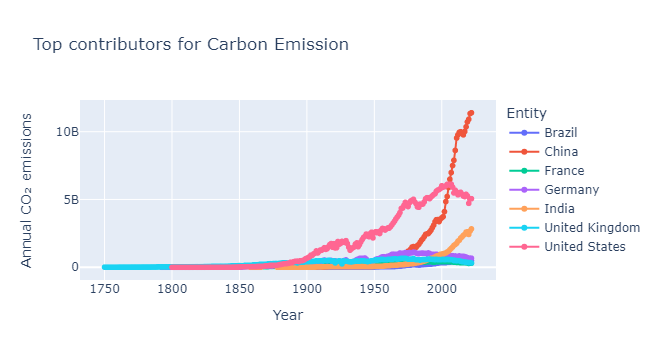

In [6]:
import plotly.express as px

# List of specific entities to include
selected_countries = ['United States', 'China','India', 'Germany', 'Brazil', 'United Kingdom', 'France']

# Filtering the original DataFrame to include only data for the selected countries
df_selected_countries = df_annual[df_annual['Entity'].isin(selected_countries)]

# Plotting the interactive graph using Plotly
fig = px.line(df_selected_countries, x='Year', y='Annual CO₂ emissions', color='Entity',
              title='Top contributors for Carbon Emission')
fig.update_traces(mode='lines+markers', hovertemplate=None)
fig.update_traces(hoverinfo='text+name', hovertemplate='<b>%{x}</b><br>%{y} CO₂ emissions<br>')
fig.show()


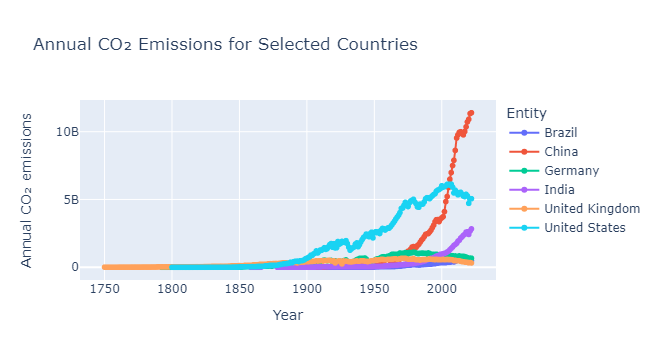

In [10]:
import plotly.express as px

# List of specific entities to include
selected_countries = ['United States', 'China','India', 'Germany', 'Brazil', 'United Kingdom']

# Filtering the original DataFrame to include only data for the selected countries
df_selected_countries = df_annual[df_annual['Entity'].isin(selected_countries)]

# Plotting the interactive graph using Plotly
fig = px.line(df_selected_countries, x='Year', y='Annual CO₂ emissions', color='Entity',
              title='Annual CO₂ Emissions for Selected Countries')

# Updating hover mode to show all countries simultaneously
fig.update_layout(hovermode='x unified')

# Customizing the hover template
fig.update_traces(mode='lines+markers', hovertemplate='<b>%{x}</b><br>%{y} CO₂ emissions<br>')

fig.show()


### According to Sector

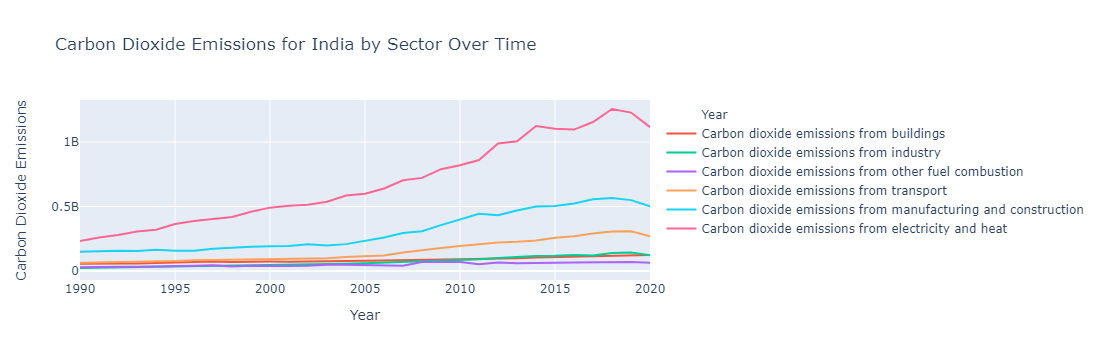

In [17]:
df_india = df_sector[df_sector['Entity'] == 'India']

# Get the years
years = df_india['Year'].unique()

# Exclude 'Carbon dioxide emissions from land use change and forestry' column
df_india_filtered = df_india.drop(columns='Carbon dioxide emissions from land use change and forestry')

# Plotting the interactive graph
fig = go.Figure()

# Loop through each parameter and add a trace for it
for column in df_india_filtered.columns[2:]:  # Exclude 'Entity' and 'Year' columns
    if column == 'Year':
        fig.add_trace(go.Scatter(x=years, y=df_india_filtered[column], mode='lines', name=column, 
                                 line=dict(color='rgba(0,0,0,0)')))  # Transparent line color for year
    else:
        fig.add_trace(go.Scatter(x=years, y=df_india_filtered[column], mode='lines', name=column))

# Customize layout
fig.update_layout(title='Carbon Dioxide Emissions for India by Sector Over Time',
                  xaxis_title='Year',
                  yaxis_title='Carbon Dioxide Emissions',
                  hovermode='x')

# Show the interactive graph
fig.show()

## According to GDP

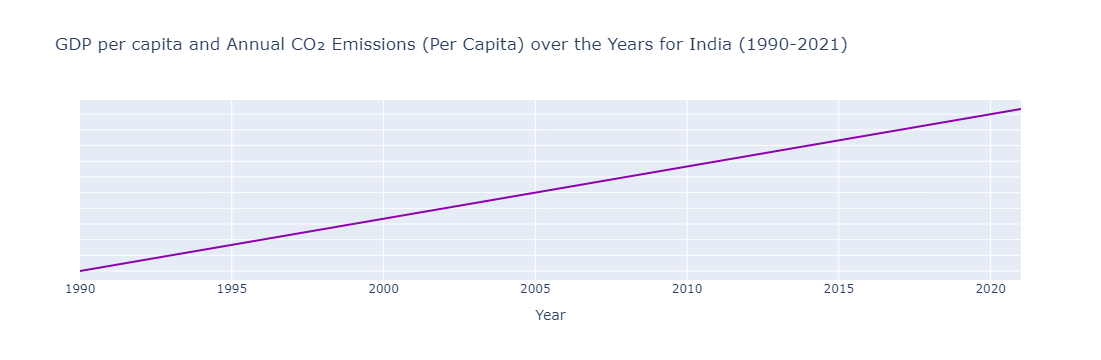

In [12]:
import plotly.graph_objects as go
import plotly.io as pio

# Assuming df_gdp is already defined and contains the required data

# Filter DataFrame for Entity=India and years between 1990 and 2021
df_filtered = df_gdp[(df_gdp['Entity'] == 'India') & (df_gdp['Year'] >= 1990) & (df_gdp['Year'] <= 2021)]

# Create trace for GDP per capita
trace_gdp = go.Scatter(x=df_filtered['Year'], 
                       y=df_filtered['GDP per capita'],
                       mode='lines',
                       line=dict(color='#9000af'),
                       name='GDP per capita',
                       hovertemplate='Year: %{x}<br>GDP per capita: %{y}<br>Annual CO₂ emissions (per capita): %{text}',
                       text=df_filtered['Annual CO2 emissions (per capita)'])

# Create layout
layout = go.Layout(title='GDP per capita and Annual CO₂ Emissions (Per Capita) over the Years for India (1990-2021)',
                   xaxis=dict(title='Year'),
                   yaxis=dict(title='', showticklabels=False),  # Hide y-axis labels and ticks
                   yaxis2=dict(title='GDP per capita', overlaying='y', side='right', showticklabels=True))

# Create figure
fig = go.Figure(data=trace_gdp, layout=layout)

# Show interactive plot
fig.show()

## Carbon emission per Capita

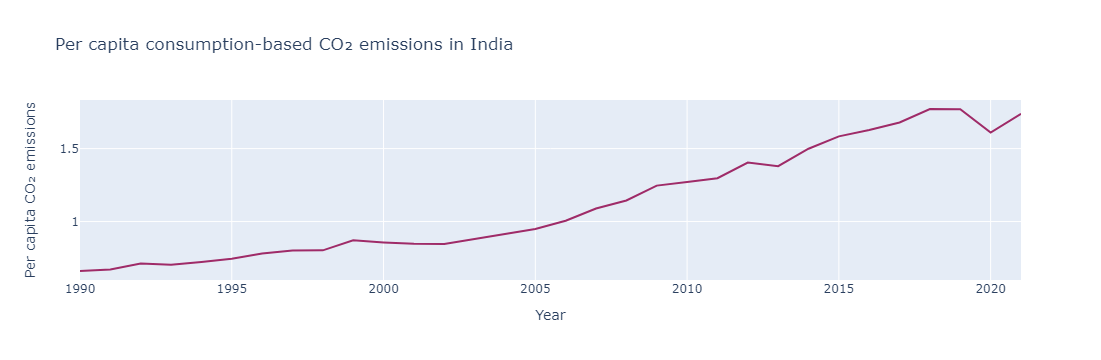

In [20]:
import plotly.graph_objects as go
import plotly.io as pio

df_filtered = df_percapita[df_percapita['Entity'] == 'India']

# Create line graph for Per capita CO2 emissions vs Year
fig = go.Figure(data=go.Scatter(x=df_filtered['Year'],
                                y=df_filtered['Per capita consumption-based CO₂ emissions'],
                                mode='lines',
                                line=dict(color='#9F2B68'),  # Change line color if needed
                                hovertemplate='Year: %{x}<br>Per capita CO₂ emissions: %{y}'))

# Update layout
fig.update_layout(title='Per capita consumption-based CO₂ emissions in India',
                  xaxis_title='Year',
                  yaxis_title='Per capita CO₂ emissions')

# Show interactive plot
pio.show(fig)


### Carbon Emission Due to trading

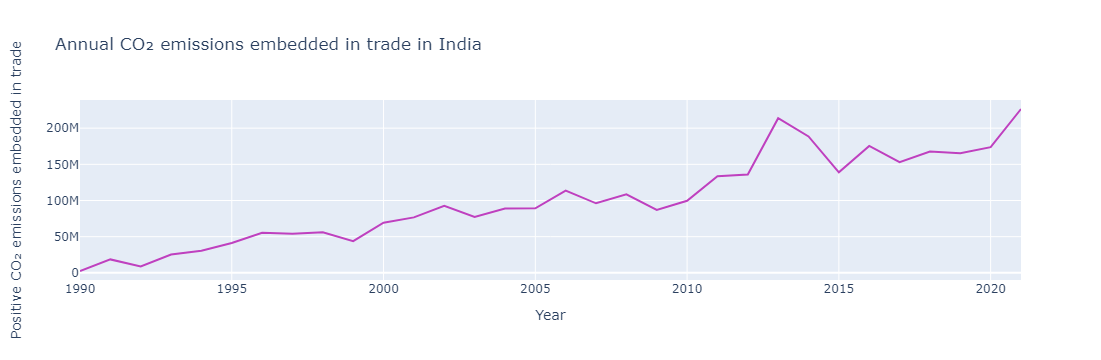

In [21]:
import plotly.graph_objects as go
import plotly.io as pio

# Assuming df_trade is already defined and contains the required data

# Filter DataFrame for Entity=India
df_filtered = df_trade[df_trade['Entity'] == 'India'].copy()  # Make a copy to avoid SettingWithCopyWarning

# Remove negative sign from Annual CO2 emissions embedded in trade for visualization
df_filtered['Positive CO₂ emissions embedded in trade'] = df_filtered['Annual CO₂ emissions embedded in trade'].abs()

# Create line graph for Positive CO2 emissions embedded in trade vs Year
fig = go.Figure(data=go.Scatter(x=df_filtered['Year'],
                                y=df_filtered['Positive CO₂ emissions embedded in trade'],
                                mode='lines',
                                line=dict(color='#BF40BF'),  # Change line color if needed
                                hovertemplate='Year: %{x}<br>Annual CO₂ emissions embedded in trade: %{text}',
                                text=df_filtered['Annual CO₂ emissions embedded in trade']))

# Update layout
fig.update_layout(title='Annual CO₂ emissions embedded in trade in India',
                  xaxis_title='Year',
                  yaxis_title='CO₂ emissions embedded in trade')

# Show interactive plot
pio.show(fig)


### Carbon Emission Due to Flaring

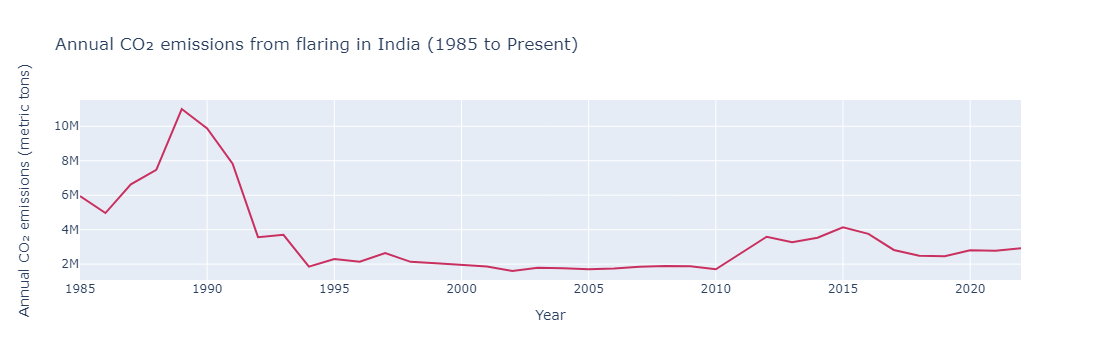

In [22]:

india_data_filtered = df_flaring[(df_flaring['Entity'] == 'India') & (df_flaring['Year'] >= 1985)]

fig = px.line(india_data_filtered, x='Year', y='Annual CO₂ emissions from flaring',
              title='Annual CO₂ emissions from flaring in India (1985 to Present)',
              color_discrete_sequence=['#CA305F'])
fig.update_xaxes(title='Year')
fig.update_yaxes(title='Annual CO₂ emissions (metric tons)')
fig.show()


### Carbon Emission Due to Transportation

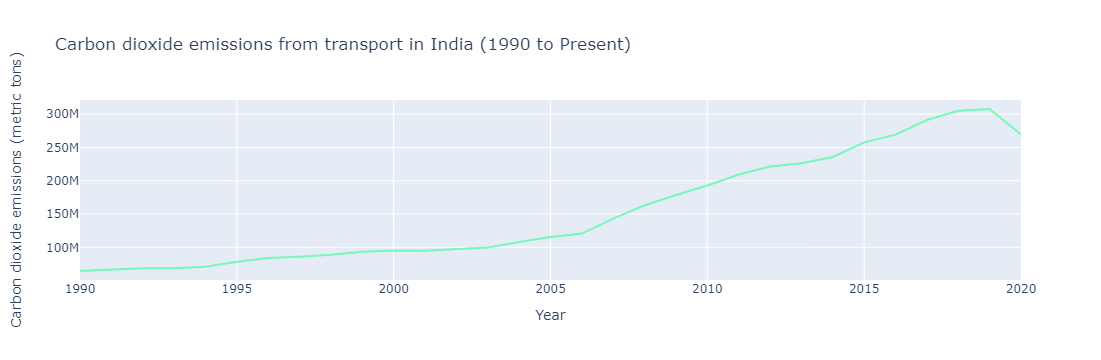

In [23]:
india_data = df_transport[(df_transport['Entity'] == 'India')]

# Plotting with custom color
fig = px.line(india_data, x='Year', y='Carbon dioxide emissions from transport', 
              title='Carbon dioxide emissions from transport in India (1990 to Present)',
              color_discrete_sequence=['#77F8B9'])  # Change color to green
fig.update_xaxes(title='Year')
fig.update_yaxes(title='Carbon dioxide emissions (metric tons)')
fig.show()

# Combine Parameters for modeling

In [3]:
dfs = [df_sector, df_gdp, df_percapita, df_trade, df_flaring, df_transport,df_annual]
for df in dfs:
    df = df[(df['Entity'] == 'India') & (df['Year'] >= 1990) & (df['Year'] <= 2020)]

# Step 2: Select desired columns from each dataset
df_sector = df_sector[['Entity', 'Year', 'Carbon dioxide emissions from buildings', 
                       'Carbon dioxide emissions from industry', 
                       'Carbon dioxide emissions from land use change and forestry', 
                       'Carbon dioxide emissions from other fuel combustion', 
                       'Carbon dioxide emissions from transport', 
                       'Carbon dioxide emissions from manufacturing and construction', 
                       'Carbon dioxide emissions from electricity and heat']]
df_gdp = df_gdp[['Entity', 'Year', 'Annual CO2 emissions (per capita)', 
                 'GDP per capita', 'Population (historical estimates)']]
df_percapita = df_percapita[['Entity', 'Year', 'Per capita consumption-based CO₂ emissions']]
df_trade = df_trade[['Entity', 'Year', 'Annual CO₂ emissions embedded in trade']]
df_flaring = df_flaring[['Entity', 'Year', 'Annual CO₂ emissions from flaring']]
df_transport = df_transport[['Entity', 'Year', 'Carbon dioxide emissions from transport']]
df_annual = df_annual[['Entity', 'Year', 'Annual CO₂ emissions']]

# Step 3: Merge the datasets based on 'Entity' and 'Year'
combined_df = df_sector.merge(df_gdp, on=['Entity', 'Year'], how='outer')
combined_df = combined_df.merge(df_percapita, on=['Entity', 'Year'], how='outer')
combined_df = combined_df.merge(df_trade, on=['Entity', 'Year'], how='outer')
combined_df = combined_df.merge(df_flaring, on=['Entity', 'Year'], how='outer')
combined_df = combined_df.merge(df_transport, on=['Entity', 'Year'], how='outer')
combined_df = combined_df.merge(df_annual, on=['Entity', 'Year'], how='outer')
# Step 4: Save the combined dataset to a new CSV file
combined_df.to_csv("D:/CLASS_WORK/CAPSTONE/CODE/DATASET/clean/combine.csv", index=False)


In [4]:
dtypes = {
    'Entity': str,
    'Year': int,
    'Carbon dioxide emissions from buildings': float,
    'Carbon dioxide emissions from industry': float,
    'Carbon dioxide emissions from land use change and forestry': float,
    'Carbon dioxide emissions from other fuel combustion': float,
    'Carbon dioxide emissions from transport': float,
    'Carbon dioxide emissions from manufacturing and construction': float,
    'Carbon dioxide emissions from electricity and heat': float,
    'Annual CO2 emissions (per capita)': float,
    'GDP per capita': float,
    'Population (historical estimates)': float,
    'Per capita consumption-based CO₂ emissions': float,
    'Annual CO₂ emissions embedded in trade': float,
    'Annual CO₂ emissions from flaring': float,
    'Carbon dioxide emissions from transport': float
}

# Load the combined CSV file with specified data types
combined_df = pd.read_csv("D:/CLASS_WORK/CAPSTONE/CODE/DATASET/clean/combine.csv",  dtype=dtypes, thousands=',')

# Filter data for entity India
india_data = combined_df[combined_df['Entity'] == 'India']

# Save the filtered data to a new CSV file
india_data.to_csv("D:/CLASS_WORK/CAPSTONE/CODE/DATASET/clean/india_data.csv", index=False)



In [5]:
india_data = pd.read_csv("D:/CLASS_WORK/CAPSTONE/CODE/DATASET/clean/india_data.csv")
india_data['Annual CO₂ emissions embedded in trade'] = india_data['Annual CO₂ emissions embedded in trade'].abs()
india_data.to_csv("D:/CLASS_WORK/CAPSTONE/CODE/DATASET/clean/india_new.csv", index=False)

# Exploratory Data Analysis

In [5]:
data = pd.read_csv("D:/CLASS_WORK/CAPSTONE/CODE/DATASET/clean/india_new.csv")

print("First few rows of the data:")
print(data.head())

print("\nInformation about the data:")
print(data.info())

# Check for missing values
print("\nMissing values:")
print(data.isnull().sum())

# Summary statistics
print("\nSummary statistics:")
print(data.describe())


First few rows of the data:
  Entity  Year  Carbon dioxide emissions from buildings  \
0  India  1990                                 56410000   
1  India  1991                                 59280000   
2  India  1992                                 58560000   
3  India  1993                                 58880000   
4  India  1994                                 63490000   

   Carbon dioxide emissions from industry  \
0                                22350000   
1                                24500000   
2                                25160000   
3                                26600000   
4                                28540000   

   Carbon dioxide emissions from land use change and forestry  \
0                                         -222390000            
1                                         -222390000            
2                                         -222390000            
3                                         -222390000            
4                    

# Training and Testing

In [6]:
india_data = pd.read_csv("D:/CLASS_WORK/CAPSTONE/CODE/DATASET/clean/india_data.csv")
print("Column names in the dataset:")
for col in data.columns:
    print(col)

Column names in the dataset:
Entity
Year
Carbon dioxide emissions from buildings
Carbon dioxide emissions from industry
Carbon dioxide emissions from land use change and forestry
Carbon dioxide emissions from other fuel combustion
Carbon dioxide emissions from transport_x
Carbon dioxide emissions from manufacturing and construction
Carbon dioxide emissions from electricity and heat
Annual CO2 emissions (per capita)
GDP per capita
Population (historical estimates)
Per capita consumption-based CO₂ emissions
Annual CO₂ emissions embedded in trade
Annual CO₂ emissions from flaring
Carbon dioxide emissions from transport_y
Annual CO₂ emissions


In [7]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
# Features remain the same as before
features = ['Year',
            'Carbon dioxide emissions from industry',
            'Carbon dioxide emissions from land use change and forestry',
            'Carbon dioxide emissions from other fuel combustion',
            'Carbon dioxide emissions from transport_x',
            'Carbon dioxide emissions from manufacturing and construction',
            'Carbon dioxide emissions from electricity and heat',
            'Annual CO2 emissions (per capita)',
            'Annual CO₂ emissions embedded in trade',
            'Annual CO₂ emissions from flaring']
target = 'Annual CO₂ emissions'

X = data[features]
y = data[target]

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Shape of training set (X_train):", X_train.shape)
print("Shape of testing set (X_test):", X_test.shape)
print("Shape of training set (y_train):", y_train.shape)
print("Shape of testing set (y_test):", y_test.shape)
test_years = X_test['Year'].values  # Extracting the years from the test set

print("Test Years:", test_years)

Shape of training set (X_train): (24, 10)
Shape of testing set (X_test): (7, 10)
Shape of training set (y_train): (24,)
Shape of testing set (y_test): (7,)
Test Years: [2017 2005 2013 2007 1998 1999 2019]


## Modeling

## Compiling and training the model

## CNN

In [13]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout

# Assuming X contains your input features and y contains the target variable

# Convert DataFrame to numpy array
X_array = X.values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_array, y, test_size=0.2, random_state=42)

# Reshape the input data to match the expected input shape of Conv1D layers
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define the CNN model
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Adding dropout for regularization
    Dense(1)  # Output layer with single neuron for regression task
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Print model summary
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

# Evaluate the model on the test set
loss, mae = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test MAE:", mae)

# Predict on test data
y_pred = model.predict(X_test)

# Calculate R2 score
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_10 (Conv1D)                   │ (None, 8, 64)               │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_11 (Conv1D)                   │ (None, 6, 128)              │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 768)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │          98,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 123,521 (482.50 KB)

 Trainable params: 123,521 (482.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 1983619856699752448.0000 - mae: 1282709760.0000 - val_loss: 2791808182115106816.0000 - val_mae: 1534819200.0000
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 1722675510858743808.0000 - mae: 1188877952.0000 - val_loss: 2432297841524211712.0000 - val_mae: 1431269120.0000
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 1496755970481586176.0000 - mae: 1106925824.0000 - val_loss: 2081274356310212608.0000 - val_mae: 1323132800.0000
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 1257416890687422464.0000 - mae: 1014020480.0000 - val_loss: 1750543870015307776.0000 - val_mae: 1212524544.0000
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 1088934325916794880.0000 - mae: 944928576.0000 - val_loss: 1422085112182341632.0000 - val_mae: 1091832448.0000
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 926061057154220032.0000 - mae: 859287744.0000 - val_loss: 1087073402486784000.0000 - val_mae: 9534924

In [14]:
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error

# Assuming you've run your model and got the following metrics from your original code
loss, mae = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)

# Compute the average value of the true test set for normalization
mean_y_test = np.mean(y_test)

# Calculate RMSE and express it as a percentage of the mean of y_test
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse_percent = (rmse / mean_y_test) * 100

# Calculate MAE and express it as a percentage of the mean of y_test
mae_percent = (mae / mean_y_test) * 100

# Calculate R2 Score
r2 = r2_score(y_test, y_pred)

# Print results
print("Test Loss:", loss)
print("Test MAE:", mae)
print("Test MAE as Percent:", mae_percent)  # MAE as a percentage
print("R2 Score:", r2)
print("RMSE:", rmse)
print("RMSE as Percent:", rmse_percent)  # RMSE as a percentage

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 31852873331507200.0000 - mae: 153365728.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Test Loss: 3.18528733315072e+16
Test MAE: 153365728.0
Test MAE as Percent: 9.385082640817915
R2 Score: 0.9261270479038912
RMSE: 178473705.2230832
RMSE as Percent: 10.921543519368369


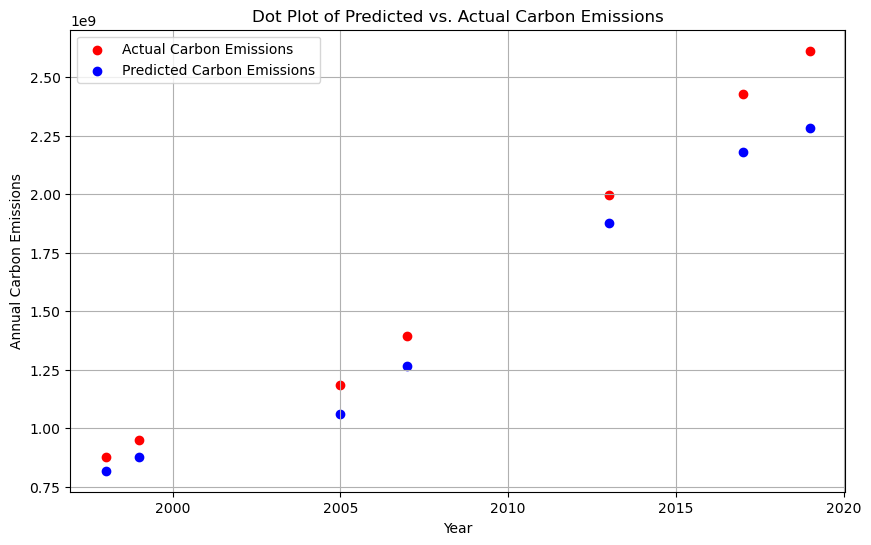

In [15]:
import matplotlib.pyplot as plt

# Test years corresponding to the data
test_years = [2017, 2005, 2013, 2007, 1998, 1999, 2019]

# Ensure the lengths of test_years, y_test, and y_pred are the same
if len(test_years) != len(y_test) or len(test_years) != len(y_pred):
    raise ValueError("The lengths of 'test_years', 'y_test', and 'y_pred' must be the same.")

# Create a dot plot (scatter plot) for predicted and actual values
plt.figure(figsize=(10, 6))
plt.scatter(test_years, y_test, color='r', label='Actual Carbon Emissions')  # Actual values in red
plt.scatter(test_years, y_pred, color='b', label='Predicted Carbon Emissions')  # Predicted values in blue
plt.xlabel('Year')  # X-axis for the years
plt.ylabel('Annual Carbon Emissions')  # Y-axis for emissions
plt.title('Dot Plot of Predicted vs. Actual Carbon Emissions')  # Plot title
plt.legend()  # Legend to distinguish between actual and predicted
plt.grid(True)  # Optional: adds grid lines for better readability
plt.show()  # Display the plot

### LSTM

In [20]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Assuming X contains your input features and y contains the target variable

# Convert DataFrame to numpy array
X_array = X.values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_array, y, test_size=0.2, random_state=42)

# Reshape the input data to match the expected input shape of LSTM layers
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define the LSTM model
model = Sequential([
    LSTM(64, activation='relu', input_shape=(X_train.shape[1], 1), return_sequences=True),
    LSTM(64, activation='relu'),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Adding dropout for regularization
    Dense(1)  # Output layer with single neuron for regression task
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Print model summary
model.summary()


C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                        │ (None, 10, 64)              │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 58,369 (228.00 KB)

 Trainable params: 58,369 (228.00 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

# Evaluate the model on the test set
loss, mae = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test MAE:", mae)

# Predict on test data
y_pred = model.predict(X_test)

# Calculate R2 score
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 2071698572104957952.0000 - mae: 1305064832.0000 - val_loss: 3328600204155813888.0000 - val_mae: 1675668864.0000
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 2067367046047334400.0000 - mae: 1302981888.0000 - val_loss: 3322503412179795968.0000 - val_mae: 1673929728.0000
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 2063339809832697856.0000 - mae: 1301872384.0000 - val_loss: 3327722518998941696.0000 - val_mae: 1675136640.0000
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 2070830232796921856.0000 - mae: 1303263360.0000 - val_loss: 3312778231832117248.0000 - val_mae: 1672152192.0000
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 2057228999083425792.0000 - mae: 1300109952.0000 - val_loss: 3310037149344071680.0000 - val_mae: 1671282304.0000
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 2041643146881794048.0000 - mae: 1295816576.0000 - val_loss: 3307379629739737088.0000 - val_mae: 1670

In [22]:
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error

# Assuming you've run your model and got the following metrics from your original code
loss, mae = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)

# Compute the average value of the true test set for normalization
mean_y_test = np.mean(y_test)

# Calculate RMSE and express it as a percentage of the mean of y_test
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse_percent = (rmse / mean_y_test) * 100

# Calculate MAE and express it as a percentage of the mean of y_test
mae_percent = (mae / mean_y_test) * 100

# Calculate R2 Score
r2 = r2_score(y_test, y_pred)

# Print results
print("Test Loss:", loss)
print("Test MAE:", mae)
print("Test MAE as Percent:", mae_percent)  # MAE as a percentage
print("R2 Score:", r2)
print("RMSE:", rmse)
print("RMSE as Percent:", rmse_percent)  # RMSE as a percentag

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 287008114358616064.0000 - mae: 415014368.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Test Loss: 2.8700811435861606e+17
Test MAE: 415014368.0
Test MAE as Percent: 25.39644411825058
R2 Score: 0.3343726654758089
RMSE: 535731381.5912325
RMSE as Percent: 32.783617011965504


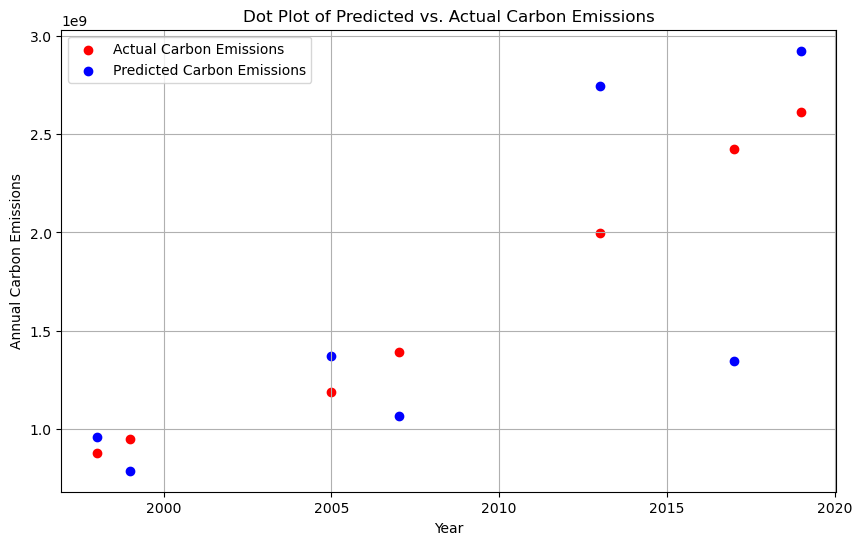

In [23]:
import matplotlib.pyplot as plt

# Test years corresponding to the data
test_years = [2017, 2005, 2013, 2007, 1998, 1999, 2019]

# Ensure the lengths of test_years, y_test, and y_pred are the same
if len(test_years) != len(y_test) or len(test_years) != len(y_pred):
    raise ValueError("The lengths of 'test_years', 'y_test', and 'y_pred' must be the same.")

# Create a dot plot (scatter plot) for predicted and actual values
plt.figure(figsize=(10, 6))
plt.scatter(test_years, y_test, color='r', label='Actual Carbon Emissions')  # Actual values in red
plt.scatter(test_years, y_pred, color='b', label='Predicted Carbon Emissions')  # Predicted values in blue
plt.xlabel('Year')  # X-axis for the years
plt.ylabel('Annual Carbon Emissions')  # Y-axis for emissions
plt.title('Dot Plot of Predicted vs. Actual Carbon Emissions')  # Plot title
plt.legend()  # Legend to distinguish between actual and predicted
plt.grid(True)  # Optional: adds grid lines for better readability
plt.show()  # Display the plot

### CNN + LSTM

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, LSTM, Input

# Define the input shape
input_shape = (X_train.shape[1], X_train.shape[2])

# Define the model
model = Sequential([
    Input(shape=input_shape),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2, strides=1),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2, strides=1),
    LSTM(100, activation='relu', return_sequences=True),
    LSTM(50, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Print model summary
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test MAE:", mae)

# Predict on test data
y_pred = model.predict(X_test)
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error

# Assuming you've run your model and got the following metrics from your original code
loss, mae = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)

# Compute the average value of the true test set for normalization
mean_y_test = np.mean(y_test)

# Calculate RMSE and express it as a percentage of the mean of y_test
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse_percent = (rmse / mean_y_test) * 100

# Calculate MAE and express it as a percentage of the mean of y_test
mae_percent = (mae / mean_y_test) * 100

# Calculate R2 Score
r2 = r2_score(y_test, y_pred)

# Print results
print("Test Loss:", loss)
print("Test MAE:", mae)
print("Test MAE as Percent:", mae_percent)  # MAE as a percentage
print("R2 Score:", r2)
print("RMSE:", rmse)
print("RMSE as Percent:", rmse_percent)  # RMSE as a percentag

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_12 (Conv1D)                   │ (None, 8, 64)               │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 7, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_13 (Conv1D)                   │ (None, 5, 128)              │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 4, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 4, 100)              │          91,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          30,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 32)                  │           1,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 148,425 (579.79 KB)

 Trainable params: 148,425 (579.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - loss: 2221489164325486592.0000 - mae: 1347707776.0000 - val_loss: 3025543188581449728.0000 - val_mae: 1613591680.0000
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 2167702567323172864.0000 - mae: 1332245504.0000 - val_loss: 2982221605813354496.0000 - val_mae: 1602876160.0000
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 2140165985800290304.0000 - mae: 1324312576.0000 - val_loss: 2897968228800135168.0000 - val_mae: 1580967040.0000
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 2084271762446483456.0000 - mae: 1308938112.0000 - val_loss: 2851750807282384896.0000 - val_mae: 1567796480.0000
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 2037019013292228608.0000 - mae: 1293109632.0000 - val_loss: 2764356125548609536.0000 - val_mae: 1543278592.0000
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - loss: 1981118742624468992.0000 - mae: 1273724544.0000 - val_loss: 2691534920685191168.0000 - val_mae: 152

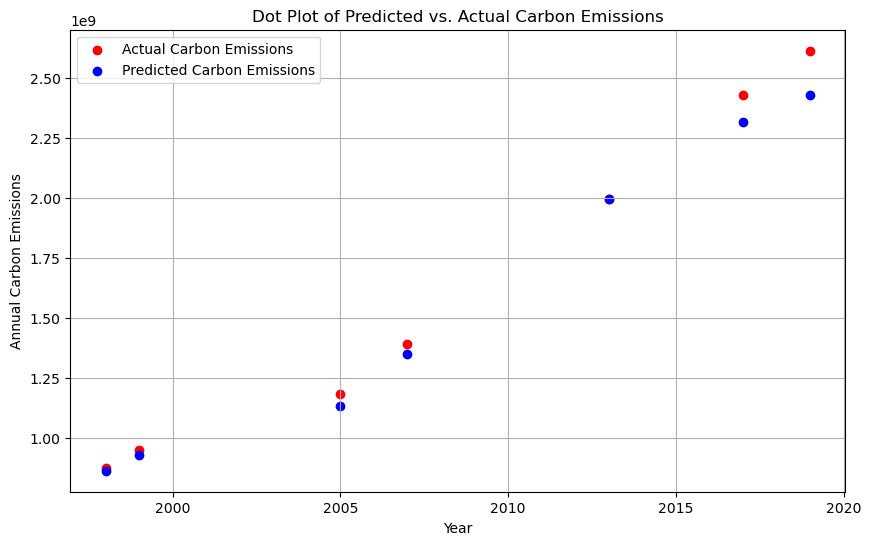

In [17]:
import matplotlib.pyplot as plt

# Test years corresponding to the data
test_years = [2017, 2005, 2013, 2007, 1998, 1999, 2019]

# Ensure the lengths of test_years, y_test, and y_pred are the same
if len(test_years) != len(y_test) or len(test_years) != len(y_pred):
    raise ValueError("The lengths of 'test_years', 'y_test', and 'y_pred' must be the same.")

# Create a dot plot (scatter plot) for predicted and actual values
plt.figure(figsize=(10, 6))
plt.scatter(test_years, y_test, color='r', label='Actual Carbon Emissions')  # Actual values in red
plt.scatter(test_years, y_pred, color='b', label='Predicted Carbon Emissions')  # Predicted values in blue
plt.xlabel('Year')  # X-axis for the years
plt.ylabel('Annual Carbon Emissions')  # Y-axis for emissions
plt.title('Dot Plot of Predicted vs. Actual Carbon Emissions')  # Plot title
plt.legend()  # Legend to distinguish between actual and predicted
plt.grid(True)  # Optional: adds grid lines for better readability
plt.show()  # Display the plot

In [18]:
print("Model's expected input shape:", model.input_shape)

Model's expected input shape: (None, 10, 1)


## Prediction for 2030

In [121]:
india_new = pd.read_csv("D:/CLASS_WORK/CAPSTONE/CODE/DATASET/clean/india_new.csv")

In [148]:
import numpy as np

# Define a function to calculate the average annual increase for each feature
def calculate_average_increase(data):
    # Initialize a dictionary to store future values
    future_values = {}

    # Calculate the average annual increase for each feature
    for feature in features:
        if feature in data.columns:
            historical_values = data[feature].dropna()
            if len(historical_values) >= 2:
                total_increase = historical_values.iloc[-1] - historical_values.iloc[0]
                average_increase = total_increase / (end_year - start_year)
                future_values[feature] = historical_values.iloc[-1] + average_increase * (2030 - end_year)
            else:
                print(f"Not enough data for {feature}.")
                future_values[feature] = np.nan
        else:
            print(f"Feature '{feature}' not found in the dataset.")
            future_values[feature] = np.nan
    
    return future_values

# Call the function to calculate future values
future_values_2030 = calculate_average_increase(india_new)

# Display the predicted future values for each feature
for feature, value in future_values_2030.items():
    print(f"{feature}: {value}")


Carbon dioxide emissions from industry: 1356444771.24183
Carbon dioxide emissions from land use change and forestry: 2255536797.3856206
Carbon dioxide emissions from other fuel combustion: 504222222.2222222
Carbon dioxide emissions from transport_x: 2786569979.7908497
Carbon dioxide emissions from manufacturing and construction: 4822223071.895425
Carbon dioxide emissions from electricity and heat: 11953246143.79085
Annual CO2 emissions (per capita): 14.862571205555556
Annual CO₂ emissions embedded in trade: 2274807536.1568627
Annual CO₂ emissions from flaring: -83864360.32026145


In [149]:
import numpy as np

# Extrapolate historical trends for each feature up to the year 2030
future_data = india_data.copy()  # Make a copy of the original dataset
features = ['Carbon dioxide emissions from industry',
            'Carbon dioxide emissions from land use change and forestry',
            'Carbon dioxide emissions from other fuel combustion',
            'Carbon dioxide emissions from transport_x',
            'Carbon dioxide emissions from manufacturing and construction',
            'Carbon dioxide emissions from electricity and heat',
            'Annual CO2 emissions (per capita)',
            'Annual CO₂ emissions embedded in trade',
            'Annual CO₂ emissions from flaring']

for feature in features:
    if feature in future_data.columns:
        historical_values = future_data[feature].dropna()
        if len(historical_values) >= 2:
            start_year = historical_values.index[0]
            end_year = historical_values.index[-1]
            total_increase = historical_values.iloc[-1] - historical_values.iloc[0]
            average_increase = total_increase / (end_year - start_year)
            future_values_2030[feature] = historical_values.iloc[-1] + average_increase * (2030 - end_year)
        else:
            print(f"Not enough data for {feature}.")
            future_values_2030[feature] = np.nan
    else:
        print(f"Feature '{feature}' not found in the dataset.")
        future_values_2030[feature] = np.nan

# Convert the extrapolated values into a format suitable for prediction
future_data = pd.DataFrame([future_values_2030], columns=features)

batch_size = 1  # Assuming a single sample for prediction
sequence_length = input_shape[0]

# Find number of features from input shape
num_features = input_shape[1]

# Reshape future_data to match the input shape of the model
future_data_reshaped = future_data.values.reshape(batch_size, sequence_length, num_features)

# Predict annual carbon emissions using the trained model
predicted_emissions = model.predict(future_data_reshaped)

# Print the predicted annual carbon emissions
print("Predicted Annual Carbon Emissions for 2030:", predicted_emissions)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Predicted Annual Carbon Emissions for 2030: [[1.3163136e+11]]


In [47]:
# Define the directory where you want to save the model
model_dir = 'D:/CLASS_WORK/CAPSTONE/CODE/RESULT/model_prediction2021.kera6s'

# Save the model with a .keras extension
model.save(model_dir)


## Prediction for 2021

In [20]:
import numpy as np
import pandas as pd
from keras.models import load_model

# Example input data for 2021
input_values_2021 = {
    'Year': 2021,
    'Carbon dioxide emissions from industry': 173900000,
    'Carbon dioxide emissions from land use change and forestry': 51480000,
    'Carbon dioxide emissions from other fuel combustion': 72020000,
    'Carbon dioxide emissions from transport_x': 331260000,
    'Carbon dioxide emissions from manufacturing and construction': 609349950,
    'Carbon dioxide emissions from electricity and heat': 1313080000,
    'Annual CO2 emissions (per capita)': 1.7389793,
    'Annual CO₂ emissions embedded in trade': 226497280,
    'Annual CO₂ emissions from flaring': 2771550
}

# Convert the input data to a DataFrame
input_df = pd.DataFrame([input_values_2021])

# Expected input shape for the model
input_shape = (10, 1)  # Example: modify to match your model's expected shape

# Reshape the data to match the expected input shape
batch_size = 1  # A single sample for prediction
sequence_length = input_shape[0]  # Number of time steps
num_features = input_shape[1]  # Number of features expected by the model

input_reshaped = input_df.values.reshape(batch_size, sequence_length, num_features)

# Load the pre-trained model
model_path = "D:/CLASS_WORK/CAPSTONE/CODE/RESULT/model_prediction2021.keras"  # Update with your model's location
model = load_model(model_path)

# Make the prediction for 2021
predicted_emissions_2021 = model.predict(input_reshaped)

# Output the prediction result
print("Predicted Annual Carbon Emissions for 2021:", predicted_emissions_2021)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 576ms/step
Predicted Annual Carbon Emissions for 2021: [[2.7855767e+09]]


In [3]:
import numpy as np
import pandas as pd
from keras.models import load_model

# Example input data for 2021
input_values_2030 = {
    'Year': 2030,
    'Carbon dioxide emissions from industry': 229800000,
    'Carbon dioxide emissions from land use change and forestry': 55680000,
    'Carbon dioxide emissions from other fuel combustion': 79860000,
    'Carbon dioxide emissions from transport_x': 35260000,
    'Carbon dioxide emissions from manufacturing and construction': 667349950,
    'Carbon dioxide emissions from electricity and heat': 1789080000,
    'Annual CO2 emissions (per capita)': 2.0389793,
    'Annual CO₂ emissions embedded in trade': 270897280,
    'Annual CO₂ emissions from flaring': 3491550
}

# Convert the input data to a DataFrame
input_df = pd.DataFrame([input_values_2030])

# Expected input shape for the model
input_shape = (10, 1)  # Example: modify to match your model's expected shape

# Reshape the data to match the expected input shape
batch_size = 1  # A single sample for prediction
sequence_length = input_shape[0]  # Number of time steps
num_features = input_shape[1]  # Number of features expected by the model

input_reshaped = input_df.values.reshape(batch_size, sequence_length, num_features)

# Load the pre-trained model
model_path = "D:/CLASS_WORK/CAPSTONE/CODE/RESULT/model_prediction2021.keras"  # Update with your model's location
model = load_model(model_path)
# Make the prediction for 2030
predicted_emissions_2030 = model.predict(input_reshaped)

# Output the prediction result
print("Predicted Annual Carbon Emissions for 2021:", predicted_emissions_2030)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step
Predicted Annual Carbon Emissions for 2021: [[3.4078659e+09]]
